In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/데이콘/tobacco.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/데이콘/tobacco.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import random
import os

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


# 1. 데이터 전처리
(1) 불필요한 컬럼 제거

In [ ]:
x_train = train.drop(['ID', 'label'], axis = 1)
y_train = train['label']

x_test = test.drop('ID', axis = 1)

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 68.3 MB/s eta 0:0

In [ ]:
from pycaret import classification
classification.setup(data=x_train, target=y_train)

,Description,Value
0,Session id,1974
1,Target,label
2,Target type,Binary
3,Original data shape,"(7000, 17)"
4,Transformed data shape,"(7000, 17)"
5,Transformed train set shape,"(4900, 17)"
6,Transformed test set shape,"(2100, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = classification.compare_models(n_select=5, fold=5, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7249,0.8079,0.6200,0.6275,0.6235,0.4068,0.4070,1.0900
gbc,Gradient Boosting Classifier,0.7212,0.8053,0.6339,0.6180,0.6254,0.4036,0.4040,1.6620
ada,Ada Boost Classifier,0.7208,0.7942,0.6211,0.6207,0.6205,0.3998,0.4001,0.5320
lightgbm,Light Gradient Boosting Machine,0.7186,0.8015,0.6072,0.6199,0.6130,0.3920,0.3925,2.3540
et,Extra Trees Classifier,0.7167,0.8098,0.5917,0.6209,0.6052,0.3847,0.3855,0.8600
xgboost,Extreme Gradient Boosting,0.7153,0.7939,0.6000,0.6153,0.6073,0.3841,0.3844,0.5980
lda,Linear Discriminant Analysis,0.7063,0.7890,0.5622,0.6094,0.5845,0.3580,0.3590,0.0960
ridge,Ridge Classifier,0.7051,0.0000,0.5472,0.6107,0.5768,0.3516,0.3532,0.1180
lr,Logistic Regression,0.7012,0.7862,0.5261,0.6090,0.5641,0.3387,0.3411,1.7080
nb,Naive Bayes,0.6959,0.7737,0.6944,0.5717,0.6263,0.3743,0.3801,0.1480


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
best[0].fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1974, verbose=0, warm_start=False)

(2) 특성 중요도 낮은 컬럼 제거

In [ ]:
feature_importances = best[0].feature_importances_
importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

In [ ]:
import matplotlib.pyplot as plt

- 한글 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
plt.rcParams['font.family'] = "NanumBarunGothic"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

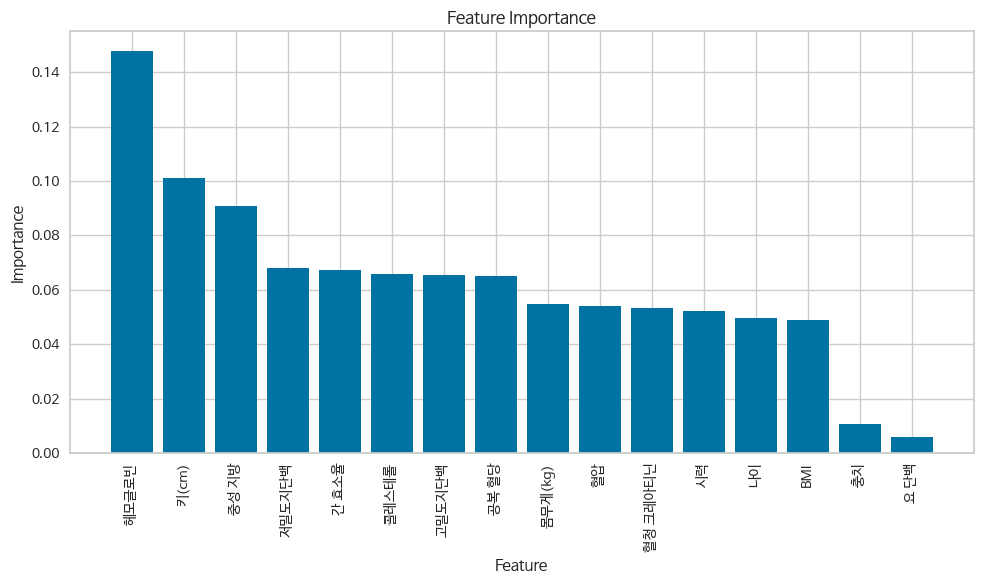

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
train.drop(['충치', '요 단백'], axis = 1, inplace = True)
test.drop(['충치', '요 단백'], axis = 1, inplace = True)

In [ ]:
train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,98,40,80,1.3,211,75,120,15.9,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,173,39,104,0.6,251,46,184,11.8,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,96,40,61,0.8,144,43,89,15.3,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,92,40,46,0.7,178,66,110,13.4,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,87,42,95,0.9,232,62,151,13.8,1.32,0


In [ ]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/train_tobac.csv', index = False)
test.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/test_tobac.csv', index = False)

# 2. 모델 학습

In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
train_data = TabularDataset('/content/drive/MyDrive/Colab Notebooks/데이콘/train_tobac.csv')
test_data = TabularDataset('/content/drive/MyDrive/Colab Notebooks/데이콘/test_tobac.csv')

label = 'label'
eval_metric = 'accuracy'
time_limit = 60 * 60

predictor = TabularPredictor(
    label=label, eval_metric=eval_metric
).fit(train_data, presets='best_quality', time_limit=time_limit, num_gpus=1)
predictor.leaderboard(silent = True)

No path specified. Models will be saved in: "AutogluonModels/ag-20230820_100950/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20230820_100950/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   144.60 GB / 179.07 GB (80.8%)
Train Data Rows:    7000
Train Data Columns: 15
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mappin

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.751286,11.170896,2742.989387,0.028221,6.203062,2,True,14
1,LightGBMLarge_BAG_L1,0.741429,2.632197,251.144828,2.632197,251.144828,1,True,13
2,RandomForestGini_BAG_L1,0.739571,0.680940,9.645428,0.680940,9.645428,1,True,5
3,LightGBM_BAG_L1,0.739143,1.287992,177.772722,1.287992,177.772722,1,True,4
4,NeuralNetFastAI_BAG_L1,0.738000,2.283496,690.409962,2.283496,690.409962,1,True,10
5,XGBoost_BAG_L1,0.737286,0.923716,196.903370,0.923716,196.903370,1,True,11
6,NeuralNetTorch_BAG_L1,0.735429,0.777701,969.846164,0.777701,969.846164,1,True,12
7,LightGBMXT_BAG_L1,0.733286,2.206026,180.686643,2.206026,180.686643,1,True,3
8,ExtraTreesEntr_BAG_L1,0.732571,0.532027,2.877257,0.532027,2.877257,1,True,9
9,ExtraTreesGini_BAG_L1,0.731429,0.613842,4.991480,0.613842,4.991480,1,True,8


# 3. 결과 예측

In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/submit_tobac.csv')
submission['label'] = model_pred
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/데이콘/autogluon.csv', index=False)